<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

###  Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [4]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Добавила команду, позволяющую отображать таблицу со всеми столбцами.
</div>

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

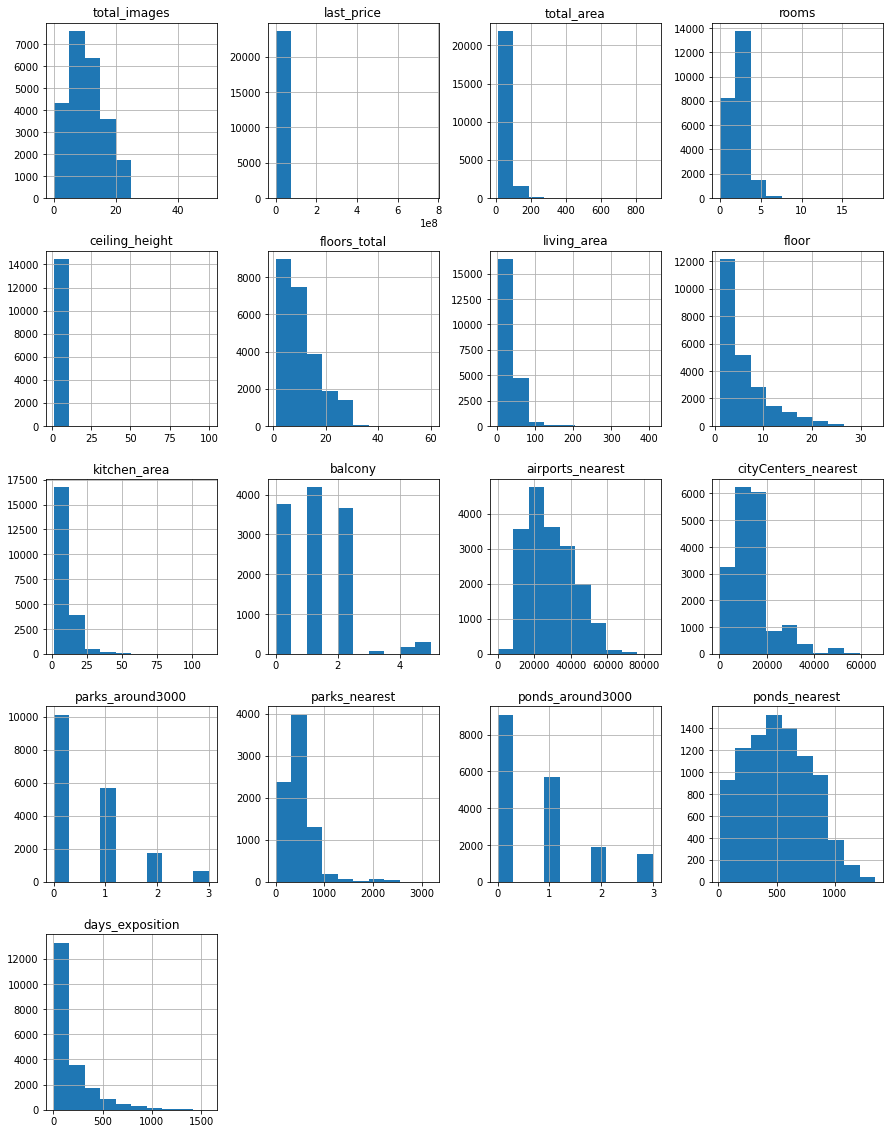

In [6]:
data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
	
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Перепробовала множество разных вариантов c ";", но строчка не исчезла. Зашла с plt.show().
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Надо сделать так)
    
    data.hist(figsize=(15, 20));
</div>

#### Вывод 
Пропущенные данные имеются во всех столбцах, за исключением:  total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, open_plan.
* Гистрограмма total_images иллюстрирует распределение количества фотографий в объявлениях, где видно, что чаще всего люди прикладывают 5-10 снимков.
* График last_price представлен в виде колонны, имеет пик около 0, что связано, вероятно, с выбросами.
* По гистограмме total_area видно, что больше квартир имеют площадь до 100кв.м., однако имеются так же и выбросы.
* По графику rooms видно, что чаще встречаются варианты до 5 комнатных квартир, что логично, однако по графику так же видно присутствие в данных выбивающихся из предедлов нормальных значений.
* График ceiling_height в целом должен быть достаточно однородным, высота потолков не имеет слишком большой вариативности, однако в наших данных имеются аномальные значения.
* Большинство размещенных объявлений floors_total находятся в промежутке от 1 до 12 этажа.
* На графики living_area и kitchen_area оказывают влияние пропуски в значениях.
* На графике balcony не видно особенностей распределения из-за 
** а) большого числа пропусков 
** б) непоказательного диапазона и числа корзин, заданных при построении графика.
* Графики parks_around3000 и ponds_around3000 отражают тенденцию к убыванию количества квартир, имеющих большее число парков и прудов в радиусе 3 км.
* Графики ponds_nearest и airports_nearest имеют нормальное распределение.
* Графики parks_nearest и cityCenters_nearest имеют как пропуски, так и выбросы.
* По гистограмме days_exposition видно, что большинство объявлений - краткосрочные, а именно примерно до 100 дней. Также есть выбросы свыше 1000 дней.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

###   Предобработка данных

#### Изучим пропуски

Пропуски есть в следующих столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, days_exposition, cityCenters_nearest, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest.
* Среди указанных столбцов последние 6 (расстояния до аэропорта, центра города, водоема, парка и их наличие в 3 км) могут иметь значения при выборе жилья, однако замена картографических данных примерными данными чревата значительными погрешностями и неточностями, ведущими к снижению качества информации.
* Столбцы **living_area, kitchen_area, locality_name** необходимы для оценки их влияния на стоимость квартиры, поэтому пропуски в площадях отдельных комнат квартиры посчитаны с использованием коэффициента: **средняя площадь комнаты(кухни) / средняя общая площадь**. По столбцу **locality_name** удалим строки с пропущенными значениями, т.к. этот параметр важен для анализа, а данные без него непоказательны.
* Пропуски в столбце **ceiling_height** можно заполнить логическими значениями: высоту потолков указать среднюю по столбцу, что соответствует распространенной высоте потолков в России (2,5-2,7м).
* Пропуски в столбце **floors_total** можно было бы допустить, что этажность дома не ниже этажа квартиры, но это приведет к искажению данных - они будут отнесены к категории "последний этаж". Поэтому удалим эти строки, т.к. их немного (<1%).
* Пустые значения по балконам заменим на 0 - их может не быть, а их замена не критична.
* Пустые данные в столбце **is_apartment** можно было бы рассмотреть как "нет", но этот фактор оказывает, как правило, значительное влияние на стоимость жилья, чтобы принять допущение, что все незаполненные данные - это апартаменты, поэтому оставим пустыми ячейки. 
* Пропуски в **days_exposition** нормальны, значит, объявление не снято с публикации.

Причины пропусков могут быть полностью случайные (человек забыл указать количество балконов, например), случайные (значения столбца кухни например связано с площадью жилья в целом, но зависит не только от него), неслучайные (человек не хотел указывать признак апартаментов в надежде получить больше откликов по объявлению). Также причины могут быть технического характера: сбой в системе, некорректная выгрузка данных.



In [7]:
# заменила пропуски в балконах на 0 - полагаю, что они пропущены, т.к. их нет
data.loc[data['balcony'].isna(), 'balcony'] = 0

# заменила пропуски в жилой площади, рассчитав среднюю долю отношения жилой площади к общей
data['share_living'] = data['living_area'] / data['total_area']
data.loc[data['living_area'].isna(), 'living_area'] = (data['total_area'] * data['share_living'].mean())

# заменила пропуски в площади кухни, рассчитав среднюю долю отношения площади кухни к общей
data['share_kitchen'] = data['kitchen_area'] / data['total_area']
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = (data['total_area'] * data['share_kitchen'].mean())

print(data['living_area'].sort_values().unique())
print(data['kitchen_area'].sort_values().unique())

#заменили пропуски в высоте потолка на среднее значение
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].mean() 
print(data['ceiling_height'].sort_values().unique())

[  2.           3.           5.         ... 356.36704419 409.
 409.7       ]
[  1.3          2.           2.24825687 ... 100.7        107.
 112.        ]
[  1.          1.2         1.75        2.          2.2         2.25
   2.3         2.34        2.4         2.45        2.46        2.47
   2.48        2.49        2.5         2.51        2.52        2.53
   2.54        2.55        2.56        2.57        2.58        2.59
   2.6         2.61        2.62        2.63        2.64        2.65
   2.66        2.67        2.68        2.69        2.7         2.71
   2.72        2.73        2.74        2.75        2.76        2.77
   2.7714989   2.78        2.79        2.8         2.81        2.82
   2.83        2.84        2.85        2.86        2.87        2.88
   2.89        2.9         2.91        2.92        2.93        2.94
   2.95        2.96        2.97        2.98        2.99        3.
   3.01        3.02        3.03        3.04        3.05        3.06
   3.07        3.08        3.09 

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>living_area / kithen_area можно найти соотношение средней жилой / кухонной площади к средней общей площади и использовать полученное значение для замены пропусков
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать, так как мы не можем восстановить их с достаточной точностью. Лучше оставить их как есть.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё заполним пропуски в столбце с высотой потолков, тем более мы можем достаточно точно их восстановить так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Заменила пропуски в столбцах с жилой площадью и площадью кухни через расчет отношения площади жилой/кухни к общей и по ней рассчитав среднюю. Отменила замену пропусков в столбце с картографическими данными.\n                
Заполнила пропуски в столбце с высотой потолка средним значением по столбцу.                        
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Изучим типы данных

В столбце с датой публикации объявления тип - object, корректно изменить на datetime.
В **floors_total, days_exposition, parks_around3000, ponds_around3000, balcony** изменим тип float на целочисленный int, т.к. определяют количество, которое не может быть дробным. В столбце **days_exposition** сначала округлим до наименьшего полного числа дней.


In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data[['parks_around3000', 'ponds_around3000', 'balcony', 'floors_total']] = data[['parks_around3000', 'ponds_around3000', \
'balcony', 'floors_total']].astype('Int64')

data['days_exposition'] = data['days_exposition'].round().astype('Int64')

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Методы fillna и astype можно применить к нескольким столбюца одновременно

	df.astype({ "col1": "float64", "col2": "int64"})
<br>Если столбцов более двух, то можно применить цикл for для автоматизации процесса
</div>

#### Устраним дубликаты

In [9]:
print(data['locality_name'].sort_values().unique()) #выведем отфильтрованный список уникальных названий

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].replace('поселок|деревня|село|станции|товарищество|садовое|железнодорожной|садоводческое|некоммерческое|городского|типа|городской|коттеджный', \
'', regex = True)

# заменим таким образом оставшиеся значения, чтобы не исключать локации с приставкой при- 

data['locality_name'] = data['locality_name'].replace(' при   Вещево', 'Вещево') 
data['locality_name'] = data['locality_name'].replace(' при   Приветнинское', 'Приветнинское')

data['locality_name'] = data['locality_name'].str.strip()
print(data['locality_name'].sort_values().unique())

['Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жил' 'Жилгородок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичево' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кингисеппский' 'Кипень

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Устраним аномалии

In [11]:
# выведем уникальные значения в столбцах: высота потолка, общая площадь, стоимость квартиры, количество комнат
print(data['ceiling_height'].sort_values().unique())

print(data['total_area'].sort_values().unique())

print(data['last_price'].sort_values().unique())

print(data['rooms'].value_counts())

[  1.          1.2         1.75        2.          2.2         2.25
   2.3         2.34        2.4         2.45        2.46        2.47
   2.48        2.49        2.5         2.51        2.52        2.53
   2.54        2.55        2.56        2.57        2.58        2.59
   2.6         2.61        2.62        2.63        2.64        2.65
   2.66        2.67        2.68        2.69        2.7         2.71
   2.72        2.73        2.74        2.75        2.76        2.77
   2.7714989   2.78        2.79        2.8         2.81        2.82
   2.83        2.84        2.85        2.86        2.87        2.88
   2.89        2.9         2.91        2.92        2.93        2.94
   2.95        2.96        2.97        2.98        2.99        3.
   3.01        3.02        3.03        3.04        3.05        3.06
   3.07        3.08        3.09        3.1         3.11        3.12
   3.13        3.14        3.15        3.16        3.17        3.18
   3.2         3.21        3.22        3.23       

Аномальными кажутся значения высоты потолка равные 14. , 10.3, 8. , 26. , 27. , 1.2, 22.6, 100. ,32. , 24. , 27.5, 2. , 
20. , 25. Значения от 20 до 32 встречаются часто, это может быть опечаткой, заменим их на более распространенные значения, поделив на 10. Высота потолка меньше 2 метров или больше 8 кажется нереалистичной (меньше 2 м. еще и негуманной), от них откажемся.

In [12]:
#устраним аномалии по высоте потолка и удалим из датафрейма нелогичные значения
data.loc[(data['ceiling_height'] > 20) & (data['ceiling_height'] < 40),'ceiling_height'] = data.loc[(data['ceiling_height'] > \
20) & (data['ceiling_height'] < 40),'ceiling_height']/10
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] <= 8)]

#удалим строки, где общая площадь меньше жилой площади и жилья
data = data[data['total_area'] >= (data['living_area'] + data['kitchen_area'])]

#удалим строку с 60-этажным зданием - в Кронштадте нет таких высоких жилых зданий
data = data[data['floors_total'] != 60]

#удалим строки с пропусками в столбце floors_total 
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

#удалим строки с пустыми названиями местоположений
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

#удалим строки с числом комнат больше 10 - их немного, но они влияют на данные
data = data[(data['rooms'] <= 10)]

#удалим вариант стоимостью больше 760 млн руб., аномально высокая стоимость квартиры
data = data[(data['last_price'] < 760000000)]

display(data)

print(data['total_area'].sort_values().unique())

print(data['last_price'].sort_values().unique())

print(data['rooms'].value_counts())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,share_living,share_kitchen
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16,51.000000,8,NaN,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.771499,11,18.600000,1,NaN,False,False,11.000000,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.771499,5,34.300000,4,NaN,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.771499,14,89.797718,9,NaN,False,False,29.789403,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14,32.000000,13,NaN,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23417,9,9700000.0,133.81,2017-03-21,3,3.700000,5,73.300000,3,NaN,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,<NA>,0.547792,0.103356
23418,14,3100000.0,59.00,2018-01-15,3,2.771499,5,38.000000,4,NaN,False,False,8.500000,0,Тосно,NaN,NaN,<NA>,NaN,<NA>,NaN,45,0.644068,0.144068
23419,18,2500000.0,56.70,2018-02-11,2,2.771499,3,29.700000,1,NaN,False,False,10.623014,0,Рождествено,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,0.523810,NaN
23420,13,11475000.0,76.75,2017-03-28,2,3.000000,17,43.345754,12,NaN,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,NaN,0.303583


[ 13.   13.2  14.  ... 618.  631.  631.2]
[1.219e+04 4.300e+05 4.400e+05 ... 3.000e+08 3.300e+08 4.013e+08]
1     7944
2     7860
3     5758
4     1169
5      323
0      176
6      103
7       58
8       11
9        8
10       3
Name: rooms, dtype: int64


#### Вывод 
В данных имеются пропуски, полностью случаные и просто случайные, которые было решено в некоторых случаях заменить на 0. Это было сделано потому, что некоторые из этих данных не критичны для анализа, но удаление строк с ними привело бы к потере значимой информации.
Аномальные значения наблюдались также в высоте зданий - их я как скорректировала, используя допущение об ошибке в разрядности, так и исключила из анализа. Аномальные значения в части превышающих общую площадь квартиры суммы жилой площади и кухни, этажности дома так же были исключены. Также из датафрейма были удалены строки с пустыми значениями названий местоположений и высотой домов - заполнить их на основе средних или примерных значений невозможно, при этом они имеют важное значение при анализе, и их число невелико, что не лишит нас существенной части данных.
Есть квартиры, в которых стоимость жилья неадекватно высока по сравнению с указанными параметрами, но не имея полной информации о точном месте, фотографий квартиры и иной информации, я не стала исключать такие случаи. 

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё изучим аномалии в других столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В данных имеются пропуски, полностью случайные и просто случайные, в отношении которых было принято следующее:
    
- в некоторых случаях заменить на 0: это было сделано потому, что некоторые из этих данных не критичны для анализа, но удаление строк с ними привело бы к потере значимой информации. 
    
- замена на средние значения или расчеты, основанные на средней величине, в отстутсвии точных значений как способ сохранения качества данных и репрезентативности данных. Применение средних значений не привело к критическому изменению данных. 
    
Аномальные значения наблюдались в ряде столбцов: часть из них - выбросы (стоимость квартиры, количество комнат), а некоторые - ошибки в данных (количество этажей в квартире в Кронштадте, квартиры с общей площадью меньше суммы площади кухни и комнаты, высота потолков больше 14м.). Некоторые данные приведены к логическим значениям, некоторые удалены ввиду отсутствия возможности заполнения адекватными данными.  
    
После удаления строк с аномальными или пустыми значениями количество строк в датафрейме составило 23413. Это составляет менее 2% от первоначального числа строк - 23699, что соответствует правилу "исключаем не более 10% изначального объема данных".
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

### Проведите исследовательский анализ данных

#### Добавим новые столбцы в таблицу

In [13]:
data['square_meter_price'] = (data['last_price'] / data['total_area']).round(2) # определим стоимость кв.м. квартиры, округлим до сотых
data['exposition_day'] = data['first_day_exposition'].dt.weekday # определим день недели публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month # определим месяц публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year # определим год публикации объявления

# распределим квартиры по типам в заисимости от этажа
def type_floor(row):

    one = row['floor']
    all = row['floors_total']
    if one == 1:
        return 'первый'
    if one == all:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(type_floor, axis=1)

# переведем расстояние до центра в км и округлим до целых
data['distance'] = (data['cityCenters_nearest'] / 1000).round()

display(data)
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,share_living,share_kitchen,square_meter_price,exposition_day,exposition_month,exposition_year,floor_type,distance
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16,51.000000,8,NaN,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,0.472222,0.231481,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.771499,11,18.600000,1,NaN,False,False,11.000000,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,0.460396,0.272277,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.771499,5,34.300000,4,NaN,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,0.612500,0.148214,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.771499,14,89.797718,9,NaN,False,False,29.789403,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,NaN,NaN,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14,32.000000,13,NaN,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,0.320000,0.410000,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23417,9,9700000.0,133.81,2017-03-21,3,3.700000,5,73.300000,3,NaN,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,<NA>,0.547792,0.103356,72490.85,1,3,2017,другой,4.0
23418,14,3100000.0,59.00,2018-01-15,3,2.771499,5,38.000000,4,NaN,False,False,8.500000,0,Тосно,NaN,NaN,<NA>,NaN,<NA>,NaN,45,0.644068,0.144068,52542.37,0,1,2018,другой,NaN
23419,18,2500000.0,56.70,2018-02-11,2,2.771499,3,29.700000,1,NaN,False,False,10.623014,0,Рождествено,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,0.523810,NaN,44091.71,6,2,2018,первый,NaN
23420,13,11475000.0,76.75,2017-03-28,2,3.000000,17,43.345754,12,NaN,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,NaN,0.303583,149511.40,1,3,2017,другой,10.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23413 entries, 0 to 23421
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23413 non-null  int64         
 1   last_price            23413 non-null  float64       
 2   total_area            23413 non-null  float64       
 3   first_day_exposition  23413 non-null  datetime64[ns]
 4   rooms                 23413 non-null  int64         
 5   ceiling_height        23413 non-null  float64       
 6   floors_total          23413 non-null  Int64         
 7   living_area           23413 non-null  float64       
 8   floor                 23413 non-null  int64         
 9   is_apartment          2731 non-null   object        
 10  studio                23413 non-null  bool          
 11  open_plan             23413 non-null  bool          
 12  kitchen_area          23413 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

#### Изучим данные на основе гистограмм

**Общая площадь** \
По графику видно, что самый частый вариант квартир с площадью ≈40-45 кв.м., второй квартиль (медиана) равен 52. При этом средняя площадь квартир 60кв.м., мин - 13, макс - 631,2. Варианты квартир площадью начиная со 100 кв.м. становятся менее распространенными. Стандартное отклонение значительно отличается от средней величины, что говорит о большой доле выбросов.

count    23413.000000
mean        60.262107
std         34.833581
min         13.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64


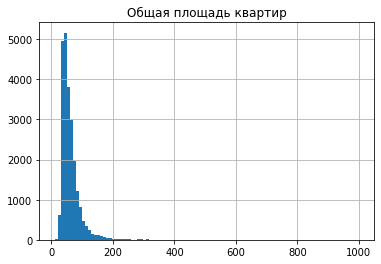

In [14]:
data['total_area'].hist(bins=100, range=(10, 1000))
print(data['total_area'].describe())
plt.title('Общая площадь квартир')
plt.show()

**Жилая площадь** \
Средняя жилая площадь - 34 кв.м., макс. жилая площадь - 356,4. Больше всего вариантов с жилой площадью, отличной от 0, равны 16-18 кв.м.


count    23413.000000
mean        34.450969
std         21.852157
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        356.367044
Name: living_area, dtype: float64


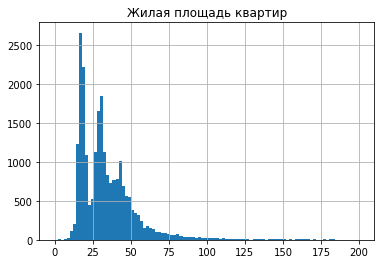

In [15]:
data['living_area'].hist(bins=100, range=(0, 200))
print(data['living_area'].describe())
plt.title('Жилая площадь квартир')
plt.show()

**Площадь кухни** \
Средняя площадь кухни - 10,5 кв.м., макс. площадь - 107. Больше всего вариантов с площадью кухни, отличной от 0, равны 6-12 кв.м.

count    23413.000000
mean        10.539500
std          5.981722
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


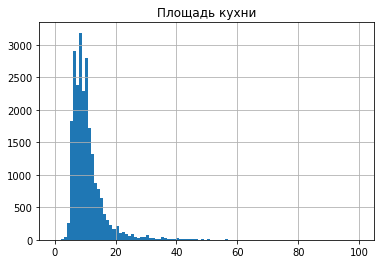

In [16]:
data['kitchen_area'].hist(bins=100, range=(0, 100))
print(data['kitchen_area'].describe())
plt.title('Площадь кухни')
plt.show()

**Цена объекта** \
Средняя цена недвижимости - 6,48 млн руб., мин. - 0,012 млн руб., макс. - 401 млн руб. Стандартное отклонение значительно отличается от средней величины, что говорит о большой доле выбросов.


count    23413.000000
mean         6.482174
std          9.308033
min          0.012190
25%          3.429000
50%          4.650000
75%          6.790000
max        401.300000
Name: last_price, dtype: float64


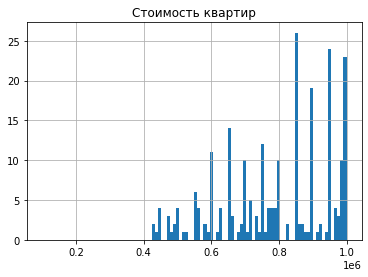

In [17]:
data['last_price'].hist(bins=100, range=(100000, 1000000))
print((data['last_price']/1000000).describe())
plt.title('Стоимость квартир')
plt.show()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

**Количество комнат** \
Среднее количество комнат - 2, ранее варианты с числом комнат более 10 были исключены, значительное влияние оказывают квартиры с количеством комнат, равным 0 - в т.ч., студии. Наиболее распространены варианты с 1-2 комнатами.

count    23413.000000
mean         2.069064
std          1.052917
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64


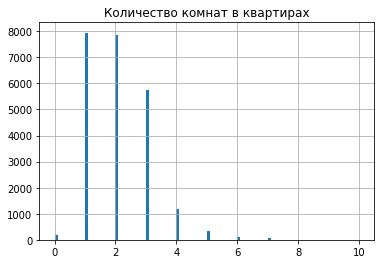

In [18]:
data['rooms'].hist(bins=100)
print(data['rooms'].describe())
plt.title('Количество комнат в квартирах')
plt.show()

**Высота потолков** \
Среднее значение - 2,7м, что соответствует стандартной распространенной высоте потолков. Стандартное отклонение достаточно мало, т.к. аномальные величины были исключены или скорректированы, а пропущенные - приведены к среднему значению. Мин. - 2,2м, макс. - 8м.

count    23413.000000
mean         2.744281
std          0.225546
min          2.200000
25%          2.600000
50%          2.771499
75%          2.771499
max          8.000000
Name: ceiling_height, dtype: float64


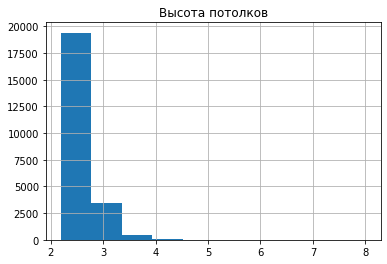

In [19]:
data['ceiling_height'].hist()
print(data['ceiling_height'].describe())
plt.title('Высота потолков')
plt.show()

**Этаж квартиры** \
Макс. этаж квартир - 33, среднее значение - 5,8. В таблице достаточно квартир на 25-33 этажах, что выбивается из 3 квартиля, равного 8.

count    23413.000000
mean         5.870713
std          4.864452
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


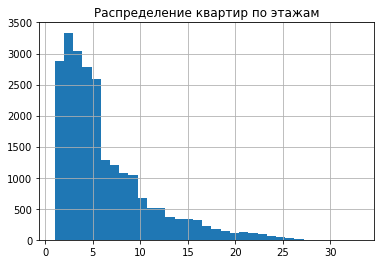

In [20]:
data['floor'].hist(bins=33, range=(1, 33))
print(data['floor'].describe())
plt.title('Распределение квартир по этажам')
plt.show()

**Тип этажа квартиры** \
Самый частый вариант этажа отличен от первого и последнего, он встречается в 17225 объявлениях.

count      23413
unique         3
top       другой
freq       17225
Name: floor_type, dtype: object


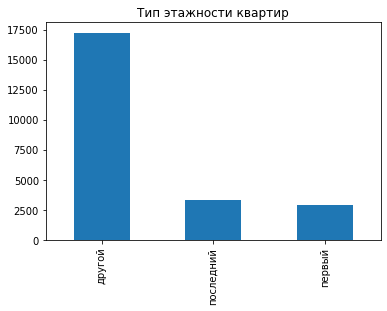

In [21]:
data['floor_type'].value_counts().plot(kind='bar')
print(data['floor_type'].describe())
plt.title('Тип этажности квартир')
plt.show()

**Общее количество этажей в доме** \
Макс. высота дома в таблице - 52 этажа, средняя - 10. Стандартное отклонение существенно и составляет 6,6. Ранее пустые и аномальное (60 этажей) значения были удалены, но на распределение влияет 52-этажный дом в Санкт-Петербурге.

count    23413.000000
mean        10.663905
std          6.577568
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64


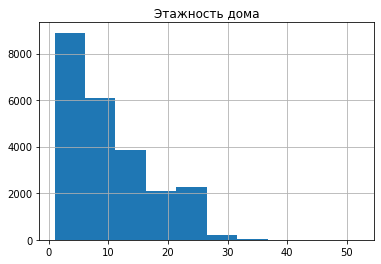

In [22]:
data['floors_total'].hist()
print(data['floors_total'].describe())
plt.title('Этажность дома')
plt.show()

**Расстояние до центра города в метрах** \
Ввиду отсутствия точных картографических данных для замены пустые строки изменены не были. Макс.расстояние - 65968м, мин. - 181м, среднее значение - 14202м. Стандартное отклонение велико - 8613м, что характеризует разницу между значениями в выборке и средней величиной.

count    17959.000000
mean     14202.266830
std       8613.404268
min        181.000000
25%       9241.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


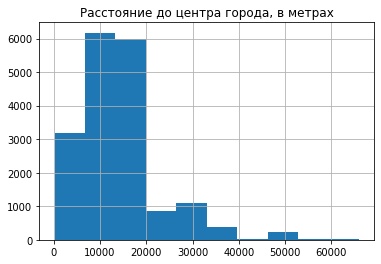

In [23]:
data['cityCenters_nearest'].hist()
print(data['cityCenters_nearest'].describe())
plt.title('Расстояние до центра города, в метрах')
plt.show()

**Расстояние до ближайшего аэропорта** \
Макс.расстояние - 84869м, среднее - 28805м. При этом стандартное отклонение велико - 12632м, что говорит о неоднородности выборки. Медиана приближена к средней величине и можно было бы допустить симметричность распределения, но у нас около 25% данных о расстоянии отсутствуют.

count    17936.000000
mean     28805.852587
std      12632.164284
min          0.000000
25%      18573.750000
50%      26765.000000
75%      37278.750000
max      84869.000000
Name: airports_nearest, dtype: float64


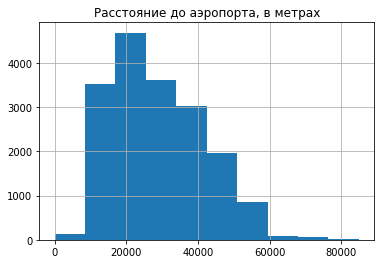

In [24]:
data['airports_nearest'].hist()
print(data['airports_nearest'].describe())
plt.title('Расстояние до аэропорта, в метрах')
plt.show()

**Расстояние до ближайшего парка** \
Мин. расстояние до парка - 1м, макс. - 3км. При этом среднее расстояние равно 490м, а медиана - 455. Отметим, что только около трети данных таблицы содержат информацию о расстоянии до ближайшего парка, замена пустых значений нецелесообразна.

count    7982.000000
mean      490.774117
std       341.272553
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


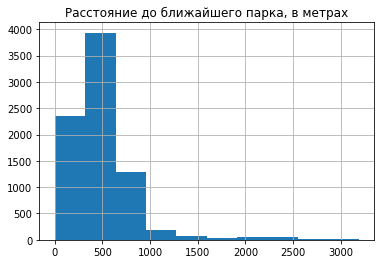

In [25]:
data['parks_nearest'].hist()
print(data['parks_nearest'].describe())
plt.title('Расстояние до ближайшего парка, в метрах')
plt.show()

**День и месяц публикации объявления** \
Больше всего объявлений было опубликовано в феврале,меньше всего - в мае. Четверг и вторник наиболее популярны при публикации объявлений, в четверг чуть больше, чем во вторник. В выходные объявлений почти в два раза меньше, чем в будни.

count    23413.000000
mean         2.567932
std          1.787837
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_day, dtype: float64


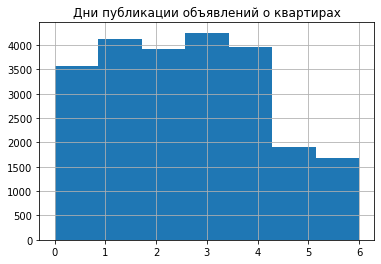

In [26]:
data['exposition_day'].hist(bins=7)
print(data['exposition_day'].describe())
plt.title('Дни публикации объявлений о квартирах')
plt.show()

count    23413.000000
mean         6.399821
std          3.493705
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64


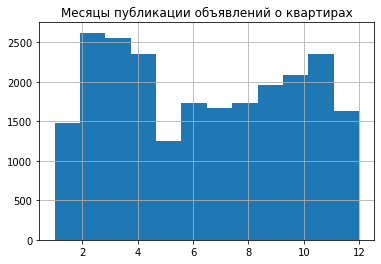

In [27]:
data['exposition_month'].hist(bins=12)
print(data['exposition_month'].describe())
plt.title('Месяцы публикации объявлений о квартирах')
plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Скорректированы выводы с учетом изменений в датафрейме после обработки пропусков и аномальных значений. Представление графиков также дополнено заголовками.
</div>

#### Изучим продажи квартир

Отметим, что 3152 квартир (13,5% от общего числа обработанной выборки) еще не продано. Средний срок продажи квартиры - 6 месяцев (181 день). Половина всех квартир была продана через 95 дней. Макс.дата продажи - больше 4 лет (1580 дней). Самая быстрая продажа квартиры состоялась за 1 день. Нормальным считается продажа в интервале от 0 до примено 520 дней (пределы "усов").

count    20261.000000
mean       180.940921
std        219.828369
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


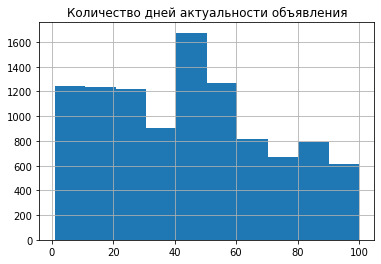

In [28]:
data['days_exposition'].hist(range=(1,100))
print(data['days_exposition'].describe())
plt.title('Количество дней актуальности объявления')
plt.show()

<AxesSubplot:>

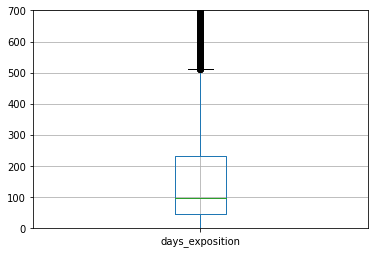

In [29]:
import matplotlib.pyplot as plt 
plt.ylim(0, 700) 
data.boxplot(column=['days_exposition'])

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Оценка влияния факторов общую (полную) стоимость объекта

0.6960611264166623


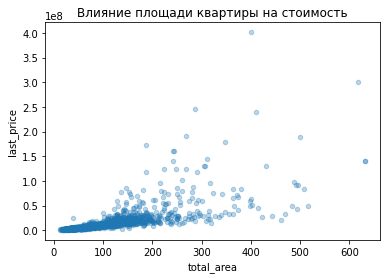

In [30]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price',\
x='total_area', alpha=0.3)
print(data['last_price'].corr(data['total_area']))
plt.title('Влияние площади квартиры на стоимость')
plt.show()

0.622198792354935


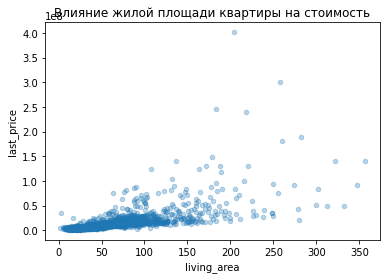

In [31]:
data.pivot_table(index='living_area', values='last_price', aggfunc='mean').reset_index().plot(kind='scatter', y='last_price',\
x='living_area', alpha=0.3)
print(data['last_price'].corr(data['living_area']))
plt.title('Влияние жилой площади квартиры на стоимость')
plt.show()

0.5393335137770513


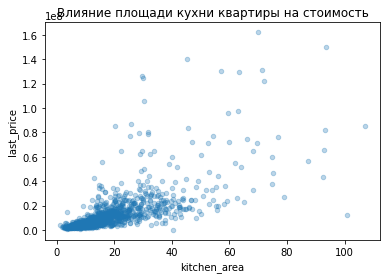

In [32]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean').reset_index().plot(kind='scatter', y='last_price',\
x='kitchen_area', alpha=0.3)
print(data['last_price'].corr(data['kitchen_area']))
plt.title('Влияние площади кухни квартиры на стоимость')
plt.show()

0.3889419205698402


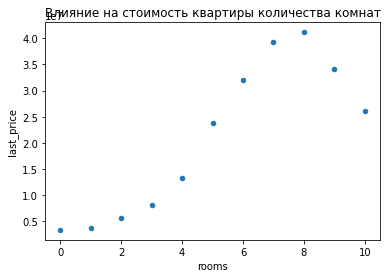

In [33]:
data.pivot_table(index='rooms', values='last_price', aggfunc='mean').reset_index().plot(kind='scatter', y='last_price',\
x='rooms')
print(data['last_price'].corr(data['rooms']))
plt.title('Влияние на стоимость квартиры количества комнат')
plt.show()

<AxesSubplot:title={'center':'Тип этажа-стоимость квартиры'}>

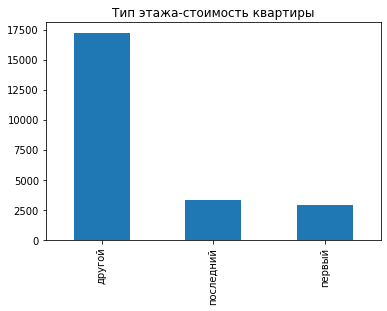

In [34]:
data['floor_type'].value_counts().plot(kind='bar', y='last_price', title='Тип этажа-стоимость квартиры')


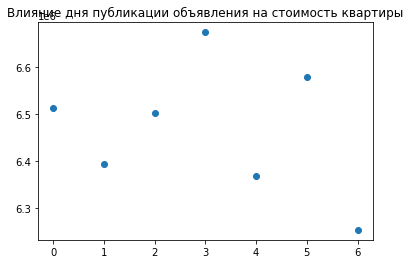

In [35]:
data_exposition_day = data.groupby('exposition_day')['last_price'].mean().reset_index()
plt.scatter(x=data_exposition_day['exposition_day'], y=data_exposition_day['last_price'])
plt.title('Влияние дня публикации объявления на стоимость квартиры')
plt.show()

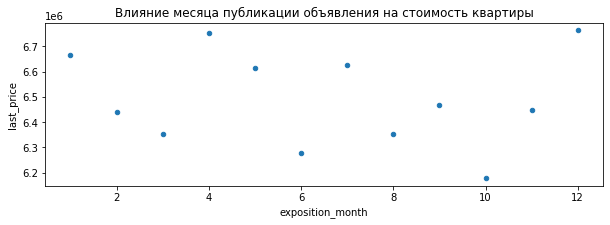

In [36]:
data.pivot_table(index='exposition_month', values='last_price', aggfunc='mean').reset_index().plot(kind='scatter', y='last_price',\
x='exposition_month', figsize=(10, 3))
plt.title('Влияние месяца публикации объявления на стоимость квартиры')
plt.show()

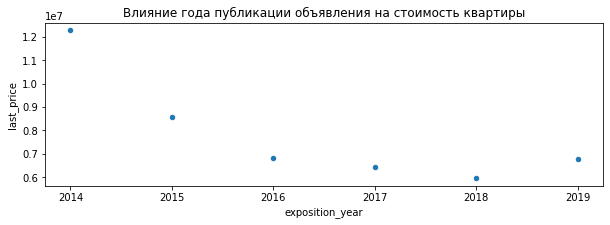

In [37]:
data.pivot_table(index='exposition_year', values='last_price', aggfunc='mean').reset_index().plot(kind='scatter', y='last_price',\
x='exposition_year', figsize=(10, 3))
plt.title('Влияние года публикации объявления на стоимость квартиры')
plt.show()

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для дня недели, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану. Графики у тебя уже есть, поэтому остаётся только удалить расчет корреляции)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Вывод по оценке факторов
* Зависимость между стоимостью квартиры и общей площадью незначимая, коэффициент корреляции равен 0.69. 
Исследование зависимости цены жилья от жилой площади, от площади кухни еще менее значимая: 0,62 и 0,54 соответственно. На это оказывает влияние в т.ч. замена пропусков на расчет по среднему значению. Во всех трех случаях связь положительная, что логично: как правило, чем больше площадь квартиры, тем больше она стоит при прочих равных условиях. Однако нельзя сказать, что эти факторы имеют решающее влияние на стоимость жилья в нашем примере - это связано с действием и других факторов (люди и правда покупают жилье не только из-за площади квартиры), и с заменой пропущенных значений.
* По графику связь достаточно значимая и положительная (до 8 комнат), на основании коэффициента корреляции зависимость стоимости жилья от количества комнат очень слабая (0,39), до 8 комнат наблюдается положительная связь, с 9 по 10 она становится отрицательной, то есть стоимость таких квартир снижается. Такое неоднородное распределение связано с тем, что квартиры с большим числом комнат неликвидны относительно квартир с 1-3 комнатами, т.к. на них меньше спрос. 
* Зависимость стоимости жилья от типа этажа - отрицательная и по графику достаточно сильная. Это связано и с тем, что промежуточные этажи более многочисленны, и с тем, что они более популярные: многие люди при поиске жилья исключают из поиска первые этажи и последние. Но это не означает, что этаж оказывает прямое и сильное влияние на стоимость квартиры.
* Зависимость стоимости жилья от дня и месяца публикации объявления о продаже отсутствует. Это логично, т.к. подобные факторы являются краткосрочными и не имеют влияния на стоимость жилья.
* Что касается зависимости стоимости жилья от года публикации объявления, то по графику мы видим отрицательную ярко выраженную связь. График демонстрирует снижение стоимости в Санкт-Петербурге и Ленинградской области с 2014 по 2018 и рост в 2019 г. Однако это противоречит действительной динамике стоимости жилья. По данным анализа динамики стоимости жилья в Санкт-Петербурге и близких к нему населенных пунктах стоимость жилья увеличивается с 2015г. (снижение наблюдалось после кризиса 2008г. до 2015г.). При этом по аналитическим данным в разные периоды времени стоимость первичного и вторичного жилья имеет разную динамику, на рост цен на рынке первичного жилья оказывают влияние различные программы господдержки приобретения жилья в новостройках, ведущее к росту спроса, и подорожание импортных материалов вследствии роста курса доллара.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Представление графиков и вывод скорректированы.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

#### Рассчитаем среднюю цену одного кв.м в топ-10 населённых пунктах по числу объявлений

                 square_meter_price
locality_name                      
Санкт-Петербург       114600.999410
Пушкин                103125.819377
Кудрово                95267.605043
Парголово              90135.075215
Мурино                 85902.890434
Шушары                 78546.979201
Колпино                75480.547448
Всеволожск             68667.473964
Гатчина                68625.141155
Выборг                 58251.091197


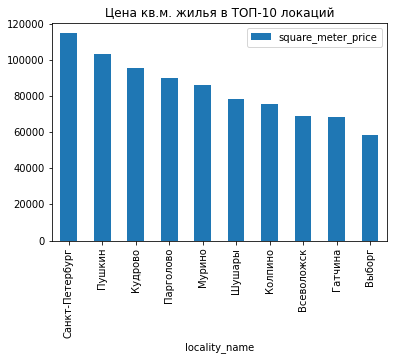

In [38]:
top_ten_locality_name = data['locality_name'].value_counts().head(10)
 
popular_locality_name = data[data['locality_name'].isin(top_ten_locality_name.index)]
 
top_meter_price = popular_locality_name.pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean') \
.sort_values(by='square_meter_price', ascending=False)
    
print(top_meter_price)

top_meter_price.plot(kind='bar')
plt.title('Цена кв.м. жилья в ТОП-10 локаций')
plt.show()

**Вывод**: среди 10 наиболее популярных населенных пунктов, отобранных по количеству размещенных объявлений, самая высокая стоимость квадратного метра ожидаемо зафиксирована в Санкт-Петербурге и составляет 114600 руб., а самая низкая - в Выборге - 58251 руб.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавила график, и правда стало нагляднее.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Красота!
</div>

#### Рассчитаем среднюю цену каждого километра в Санкт-Петербурге.

,last_price
distance,
0.0,30927928.0
1.0,21080268.0
2.0,17856928.0
3.0,11115401.0
4.0,12189910.0
5.0,14416855.0
6.0,15120166.0
7.0,14800512.0
8.0,9216761.0


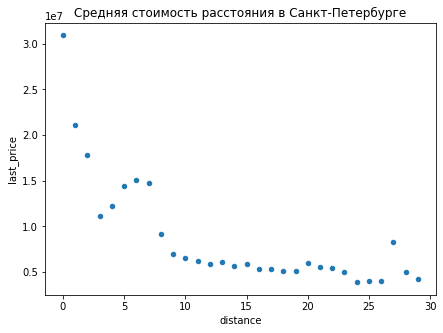

In [39]:
spb_distant_price = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance', values='last_price', \
aggfunc='mean').round()

display(spb_distant_price)
spb_distant_price.reset_index().plot(kind='scatter', y='last_price', x='distance', figsize=(7,5))
plt.title('Средняя стоимость расстояния в Санкт-Петербурге')
plt.show()

**Вывод**: в целом, с удаленностью от центра стоимость квадратного метра уменьшается. За исключением промежутка от 3 до 7 км, где стоимость обратно пропорциональна расстоянию от центра - вероятно это связано с иными преимуществами района. В остальных случаях, за исключением отдельных случаев выброса, график демонстрирует отрицательную корреляцию. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

Были проанализировали данные о продажах квартир в Санкт-Петербурге и близлежащих населенных пунктах и городах.
Была проведена предобработка данных, в которых были выявлены следующие недостатки:
* пропуски, носящие случайный и абсолютно случайный характер, что возможно как в результате действия человеческого фактора, так и в результате программных ошибок. Пропуски не критически важные я заменила на 0, некоторые были заменены на расчет с применением средних величин, часть пропусков осталась без изменений, строки с отсутствующими значениями по критически важным параметрам были удалены.
* аномальные значения были заменены на значения в пределах нормальных или исключены из датафрейма. В случаях, когда данные из-за подобных случаев теряли смысл (например, площадь квартиры, которая меньше суммы жилой площади и кухни), строки с такими данными были удалены.
* дубликаты также были устранены путем оставления только названия населенного пункта. 

Для целей дальнейшего анализа я дополнила таблицу новыми столбцами. Данные по различным параметрам были визуализированы в вииде гистограмм. На основе них "портрет" среднестатистической квартиры можно описать следующим образом:
* общей площадью 60кв.м, с жилой - 34кв.м., кухней - 10.5кв.м., двухкомнатная, находится на 5-6 этаже 10-этажного дома, расположенного в 11 км от центра города и в 29 км от аэропорта, до парка 490м, с потолками 2,7м, объявление выложено в феврале, вероятно во вторник или четверг, общей стоимостью 6.5 млн руб. 

По результатам оценки влияния факторов оказалось, что на стоимость квартиры оказывает влияние совокупность факторов - ни один фактор не продемонстрировал значимый коэффициент корреляции. При этом наибольшее влияние оказывают следующие факторы:
* площадь квартиры (коэффициент корреляции - 0.69);
* этаж квартиры - это связано как предпочтениями людей исключить первый и последний этажа, так и с влиянием статистики - вероятность размещения объявлений с типом этажа "другой" - выше;
* удаленность от центра - чем ближе к центру квартира расположена, тем выше ее цена при прочих равных условиях.
* и что логично, средняя стоимость квадратного метра жилья в Санкт-Петербурге выше, чем в других населенных пунктах.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудилась, большая часть работы сделана, но остаётся внести следующие правки:
<br>- заполнить пропуски в столбце ceiling_height
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- удалить расчет корреляции для времени продажи
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод